# Alura Challenge - Data Science


Esse desafio da Alura tem como finalidade desenvolver as habilidades de Data Science, Data Analytics e Machine Learning.

Briefing: Temos uma base de dados de clientes que deram churn e não deram churn. Iremos analisar esses dados e construir um modelo para prever quando um cliente irá dar churn.

In [1]:
import pandas as pd

In [2]:
#Ler a base de dados em json

df = pd.read_json('https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
#Organizar a coluna corretamente.

df_customer = pd.json_normalize(df.customer)
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [4]:
#Organizar as outras colunas corretamente

df_phone = pd.json_normalize(df.phone)
df_internet = pd.json_normalize(df.internet)
df_account = pd.json_normalize(df.account)

In [5]:
#Montar um data frame com as colunas organizadas

df = df.drop(columns=['customer', 'phone', 'internet', 'account'])
df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
#Verificar se todas as colunas tem o mesmo numero de linhas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
#Eliminar as linhas da coluna Churn que não possuem valor.

df = df[df['Churn'] != '']
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
#Tenure é a coluna que mostra o numero de meses de contrato do cliente.

df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [10]:
#Pesquisar quais são os clientes que possuem tenure = 0 e saber qual é valor pago mensal e o total.

df.query('tenure == 0')[['tenure', 'Charges.Total', 'Charges.Monthly']]

,tenure,Charges.Total,Charges.Monthly
945,0,,56.05
1731,0,,20.00
1906,0,,61.90
2025,0,,19.70
2176,0,,20.25
2250,0,,25.35
2855,0,,73.35
3052,0,,25.75
3118,0,,52.55
4054,0,,80.85


In [11]:
#Arrumar o dataframe colocando os valores do mensal no total.

df_custo_total = df[df['Charges.Total'] == ' '].index
df.loc[df_custo_total, 'Charges.Total'] = df.loc[df_custo_total, 'Charges.Monthly']
df.query('tenure == 0')[['tenure', 'Charges.Total', 'Charges.Monthly']]

,tenure,Charges.Total,Charges.Monthly
945,0,56.05,56.05
1731,0,20.0,20.00
1906,0,61.9,61.90
2025,0,19.7,19.70
2176,0,20.25,20.25
2250,0,25.35,25.35
2855,0,73.35,73.35
3052,0,25.75,25.75
3118,0,52.55,52.55
4054,0,80.85,80.85


In [12]:
#Verificar se todas as colunas tem o mesmo numero de linhas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [13]:
#Modificar o Dtype da coluna Charges Total

df['Charges.Total'] = df['Charges.Total'].astype(str).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


C:\Users\hugotk\AppData\Local\Temp\ipykernel_22400\2524078168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charges.Total'] = df['Charges.Total'].astype(str).astype(float)


In [14]:
#criar uma coluna dos gastos mensais

df.insert(18, 'monthly.expense',round(df['Charges.Monthly'] / 30))
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,monthly.expense,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.0,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,2.0,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,2.0,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.0,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,3.0,Mailed check,83.9,267.40


In [15]:
#Salvar dataframe arrumado

df.to_csv('dataframe_organizado.csv', header=True, index=False)

In [16]:
df = pd.read_csv('dataframe_organizado.csv')
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,monthly.expense,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.0,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,2.0,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,2.0,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.0,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,3.0,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,2.0,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,3.0,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,2.0,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,2.0,Mailed check,67.85,4627.65


In [17]:
#Traduzir os nomes das colunas.

# index = {'customerID': ' ID cliente',
#          'Churn': 'Churn', 
#          'gender': 'Gênero', 
#          'SeniorCitizen': 'Acima 65 anos',
#          'Partner': 'Casado',
#          'Dependents': 'Dependentes',
#          'tenure': 'Contrato (Meses)',
#          'PhoneService': 'Serviço telefônico', 
#          'MultipleLines': 'Multiplas linha de telefone',
#          'InternetService': 'Provedor internet', 
#          'OnlineSecurity': 'Segurança online',
#          'OnlineBackup': 'Backup online',
#          'DeviceProtection': 'Proteção no dispositivo',
#          'TechSupport': 'Suporte técnico',
#          'StreamingTV': 'TV a cabo',
#          'StreamingMovies': 'Streaming filmes',
#          'Contract': 'Tipo de contrato',
#          'PaperlessBilling': 'Fatura online',
#          'PaymentMethod': 'Forma pagamento',
#          'Charges.Monthly': 'Mensalidade',
#          'Charges.Total': 'Valor anual'
# }

In [18]:
#Substituir o nome das colunas
# df.rename(columns=index, inplace=True)
# df

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max.rows', None,'display.max.columns', None)

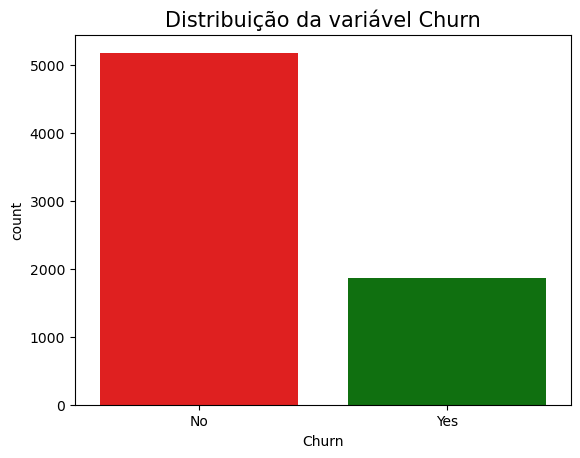

In [20]:
#Verificar o numero de Churns

sns.set_palette("flare")
ax = sns.countplot(x='Churn', data=df, palette=['red', 'green'])
ax.set_title('Distribuição da variável Churn', fontsize=15)
plt.show()

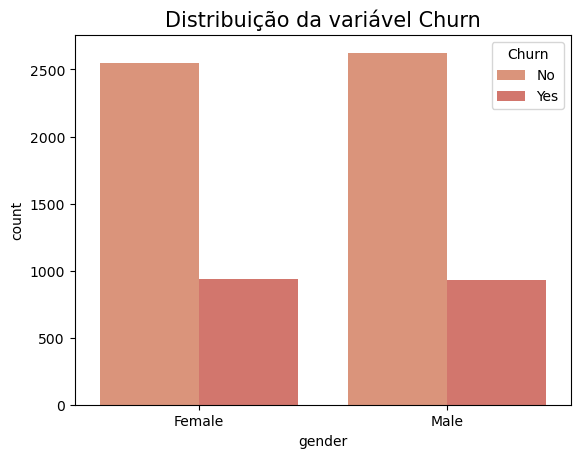

In [21]:
#Verificar se tem uma relação de Churn com o gênero do cliente

sns.set_palette("flare")
ax = sns.countplot(x='gender', hue='Churn',  data=df)
ax.set_title('Distribuição da variável Churn', fontsize=15)
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


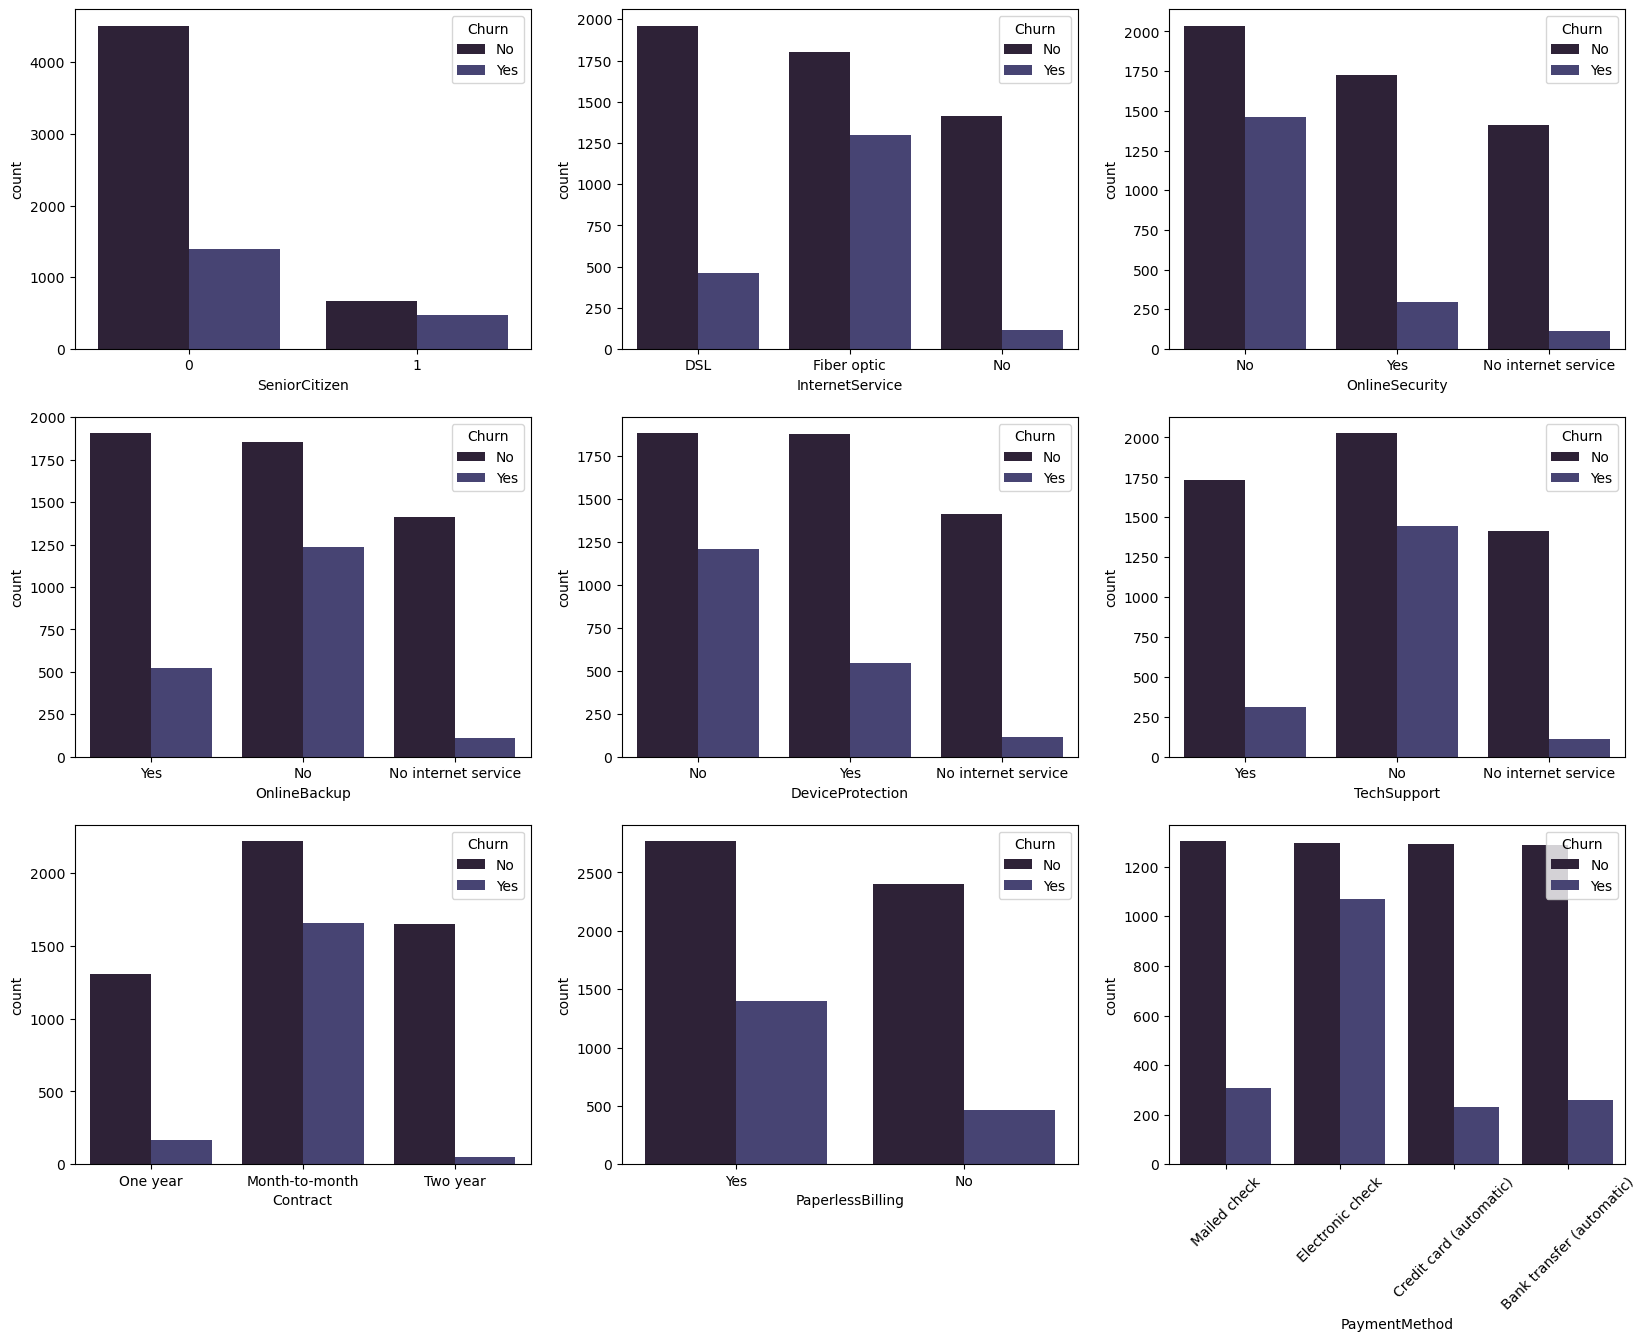

In [23]:
#Plotar diversos gráficos para visualizar se algum produto que ele possui tem relação com o Churn do cliente

columns = [
    'SeniorCitizen',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'  
]

sns.set_palette('mako')
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=[20,15])
axs = axs.flatten()
i=0
for column in columns:
    sns.countplot(x=df[column], hue='Churn', data=df, ax=axs[i])
    if i==8:
        plt.xticks(rotation=45)
    else:
        i = i + 1

In [24]:
#Transformar os dados em dados categorico

df_numerized = df.copy()

df_numerized = df_numerized.drop(columns=['customerID'])

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [25]:
df_numerized.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,monthly.expense,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0,0,1,1,9,1,0,0,0,2,0,2,2,0,1,1,2.0,3,65.6,593.30
1,0,1,0,0,0,9,1,2,0,0,0,0,0,0,2,0,0,2.0,3,59.9,542.40
2,1,1,0,0,0,4,1,0,1,0,0,2,0,0,0,0,1,2.0,2,73.9,280.85
3,1,1,1,1,0,13,1,0,1,0,2,2,0,2,2,0,1,3.0,2,98.0,1237.85
4,1,0,1,1,0,3,1,0,1,0,0,0,2,2,0,0,1,3.0,3,83.9,267.40


Text(220.72222222222223, 0.5, 'Características dos Clientes')

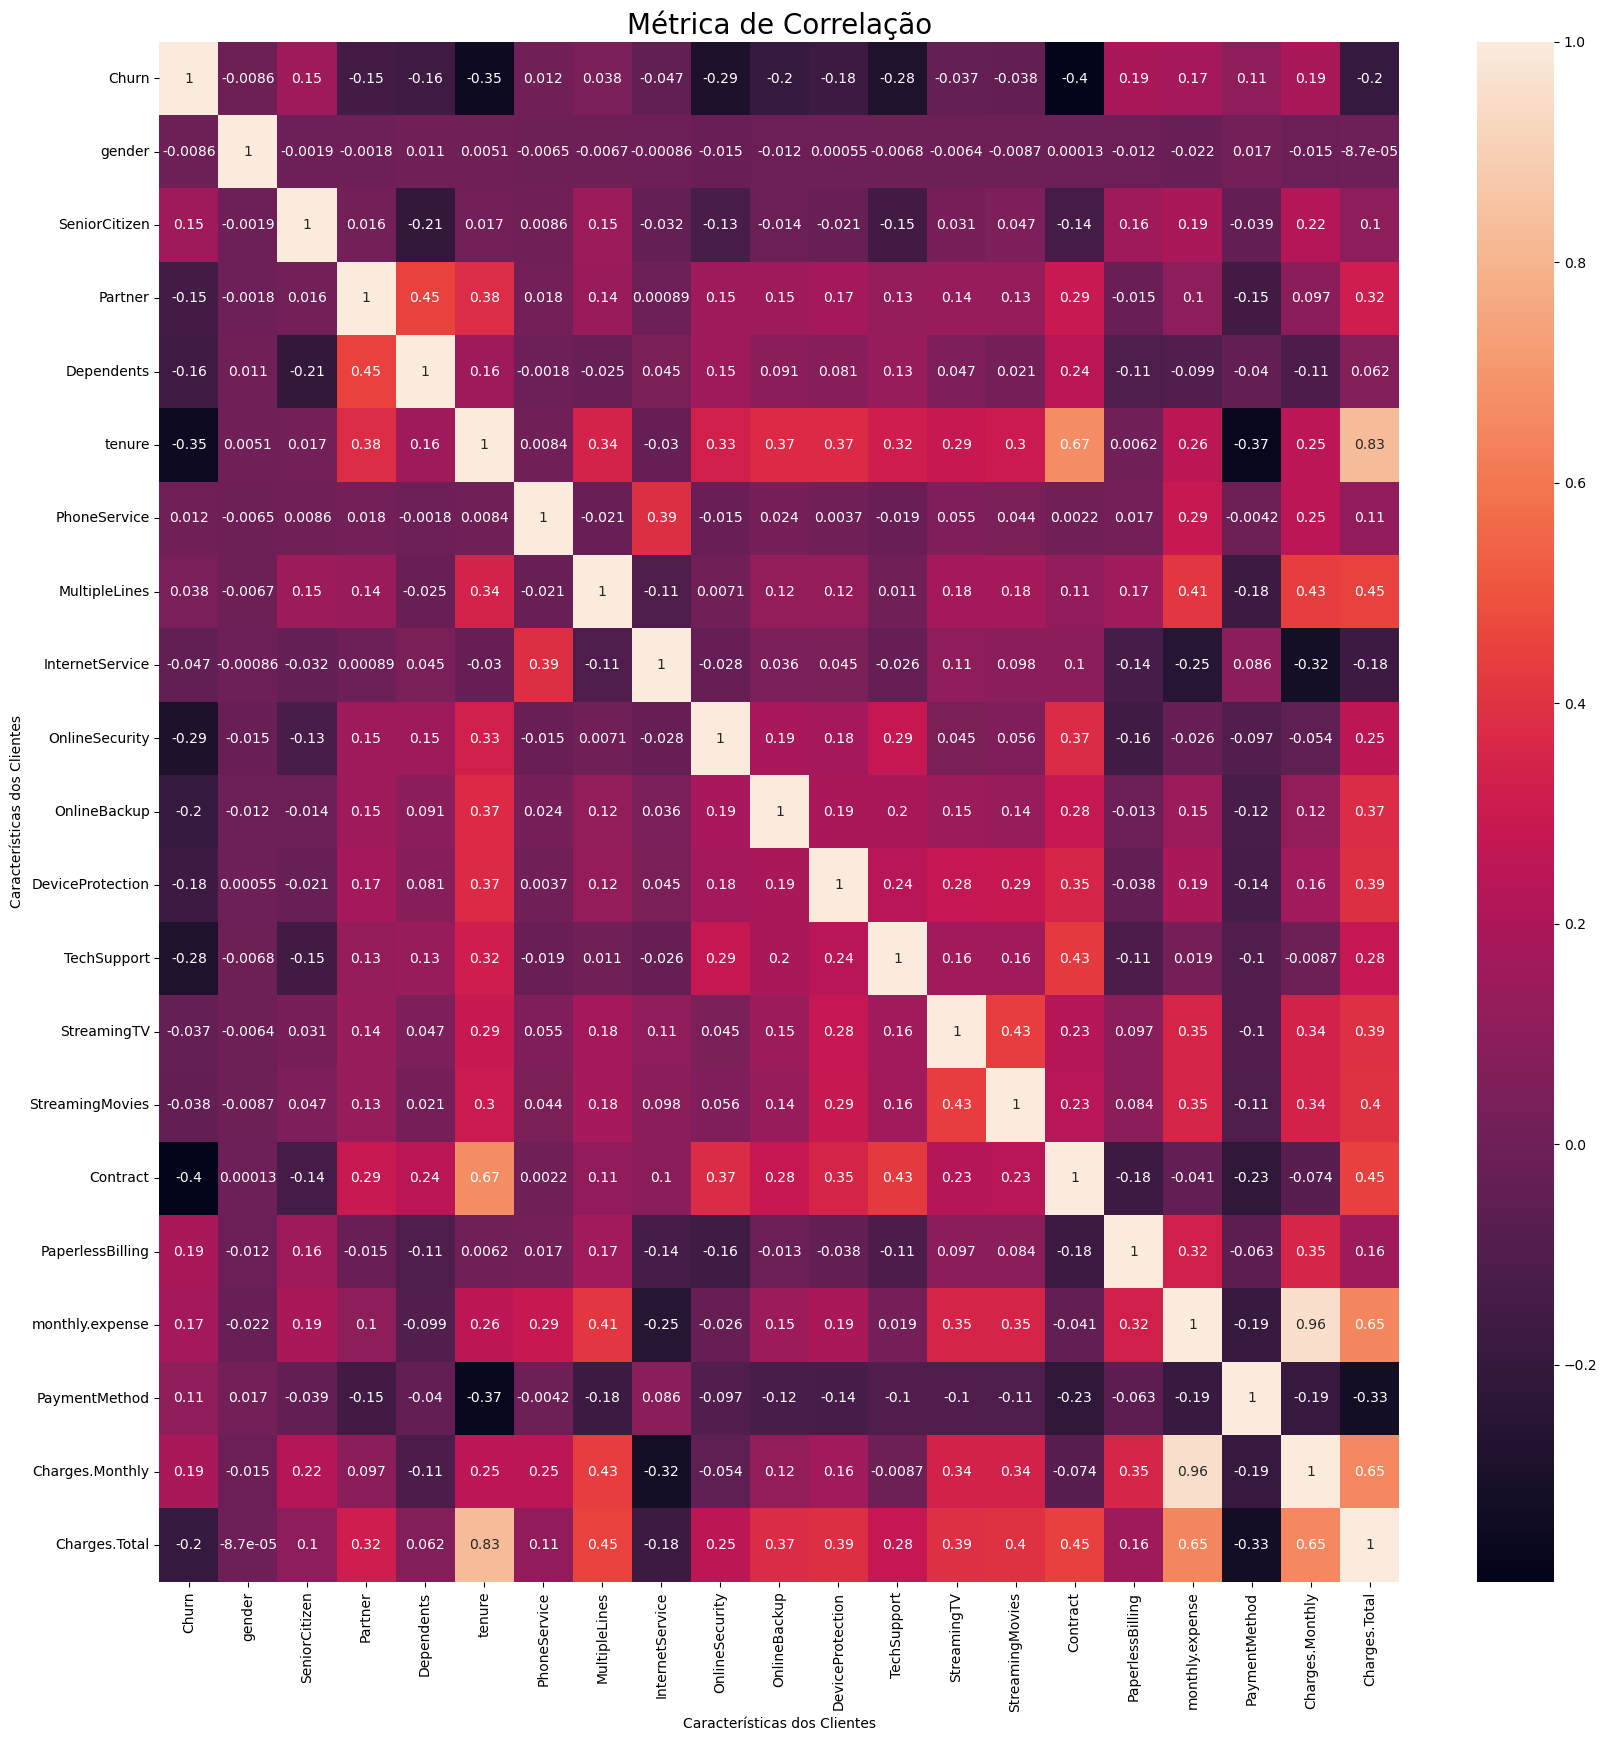

In [26]:
#mostrar a mtrix de correlação

correlation_matrix = df_numerized.corr(method='pearson')

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.title('Métrica de Correlação', size=20)
plt.xlabel('Características dos Clientes')
plt.ylabel('Características dos Clientes')

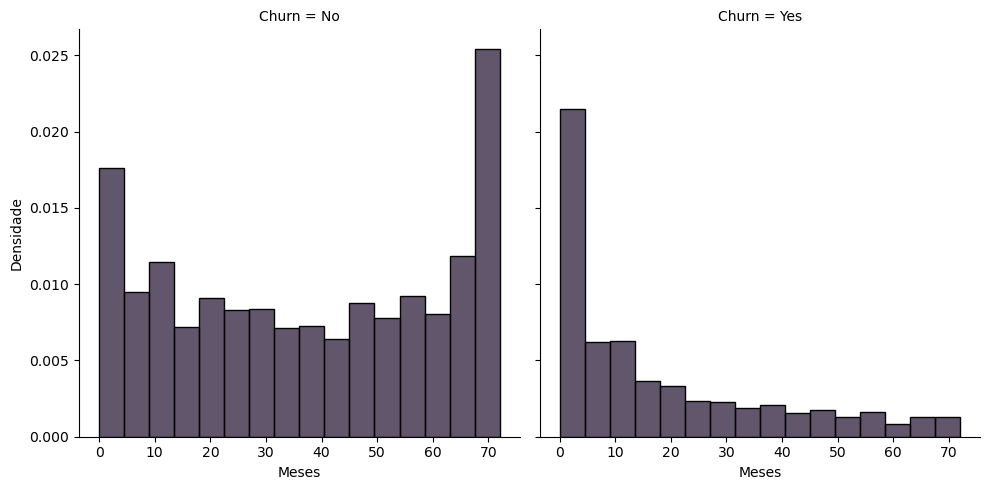

In [27]:
sns.set_palette('mako')
hist = sns.displot(df, x='tenure', col='Churn', stat='density')
hist.set_xlabels('Meses')
hist.set_ylabels('Densidade')
hist

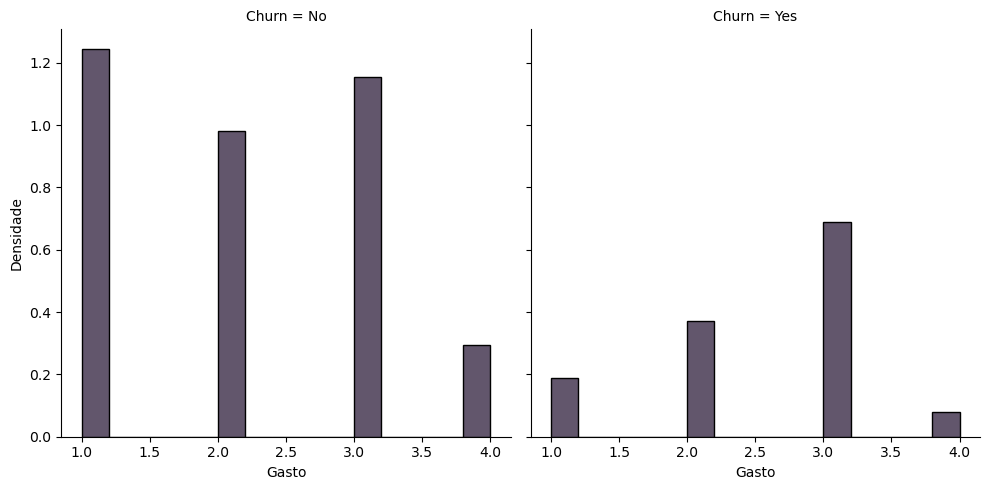

In [28]:
sns.set_palette('mako')
hist_gasto = sns.displot(df, x='monthly.expense', col='Churn', stat='density')
hist_gasto.set_xlabels('Gasto')
hist_gasto.set_ylabels('Densidade')
hist_gasto

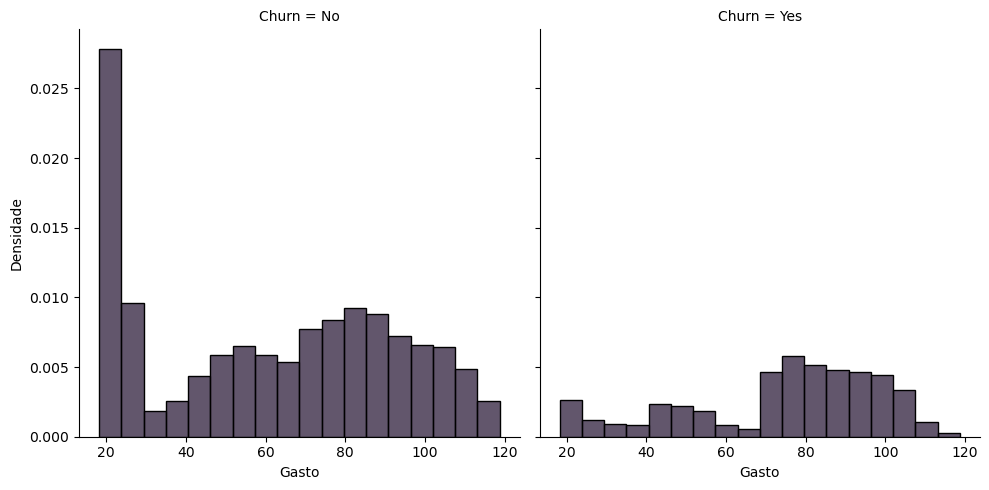

In [29]:
sns.set_palette('mako')
hist_gasto = sns.displot(df, x='Charges.Monthly', col='Churn', stat='density')
hist_gasto.set_xlabels('Gasto')
hist_gasto.set_ylabels('Densidade')
hist_gasto

In [30]:
#Remover as colunas que não serão utilizadas

df.drop(['customerID', 'Charges.Total'], axis=1, inplace=True)

In [31]:
#Verificar o que cada coluna tem de valor

for val in df.select_dtypes(include=['object']).columns:
    if len(df[val].unique()) > 2:
        print(f'{val}: {df[val].unique()}')

MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [32]:
col_encoding = ['InternetService', 'Contract', 'PaymentMethod']
df_encode = df.drop(col_encoding, axis=1)

In [33]:
#buscando se todas as colunas tem valores diferentes de nulos
for column in df_encode.columns:
    null = df_encode[column].isnull().sum()
    print(f"{column} has {null} missing values")

Churn has 0 missing values
gender has 0 missing values
SeniorCitizen has 0 missing values
Partner has 0 missing values
Dependents has 0 missing values
tenure has 0 missing values
PhoneService has 0 missing values
MultipleLines has 0 missing values
OnlineSecurity has 0 missing values
OnlineBackup has 0 missing values
DeviceProtection has 0 missing values
TechSupport has 0 missing values
StreamingTV has 0 missing values
StreamingMovies has 0 missing values
PaperlessBilling has 0 missing values
monthly.expense has 0 missing values
Charges.Monthly has 0 missing values


In [34]:
#Transformando os valores da coluna em valores numéricos

encode = {'No phone service': 0,
          'No internet service': 0,
          'Female':1,
          'Male':0,
          'Yes':1,
          'No': 0}
df_encode = df_encode.replace(encode)
df_encode.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,monthly.expense,Charges.Monthly
0,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,2.0,65.6
1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,2.0,59.9
2,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,2.0,73.9
3,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,3.0,98.0
4,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,3.0,83.9


In [35]:
#Verificar a proporção das classe para definir qual método usar de rebalanceamento

classes = df_encode['Churn'].unique()

for classe in classes:
    prop = len(df_encode[df_encode['Churn'] == classe]) / len(df_encode)
    print(f'Proporção da classe {classe}: {prop}')

Proporção da classe 0: 0.7346301292063041
Proporção da classe 1: 0.2653698707936959


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encode.drop('Churn', axis=1), df_encode['Churn'], stratify= df_encode['Churn'], test_size= 0.2, random_state=0)

In [37]:
X_train.shape

(5634, 16)

In [38]:
X_test.shape

(1409, 16)

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
#Rebalancear o dataset com o método SMOTE

smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(df_encode.drop('Churn', axis=1), df_encode['Churn'])


c:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


In [41]:
X_train.shape

(10348, 16)

In [42]:
y_train.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [43]:
f1_score_train = {}
f1_score_test = {}
tpr_test = {}
fpr_test = {}
auc_training = {}
auc_test = {}

In [44]:
#definindo alguma funções

from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

def model_per_plot(y_true, y_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train):
    f, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].set_title('Matriz de confusão')
    conf_matrix = metrics.confusion_matrix(y_true,y_pred)
    cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=  ['negative', 'positive'])
    cm_disp.plot(ax=axes[0])
    cm_disp.ax_.set_xlabel('Predição', fontsize=9)
    cm_disp.ax_.set_ylabel('Atuais', fontsize=9)
    
    axes[1].set_title('Curva ROC')
    #Create ROC curve
    axes[1].plot(fpr,tpr,label='Test AUC='+str(auc))
    axes[1].plot(fpr_train, tpr_train, label='Train AUC='+str(auc_train))
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].legend(loc=4)
    
    plt.subplots_adjust(wspace=0.50, hspace=0.1)
    plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
import numpy as np

def evaluate_model(X_train, y_train, X_test, y_test, model, param):
    gs = GridSearchCV(model, param, cv=3)
    gs.fit(X_train.to_numpy(),y_train)
    
    model.set_params(**gs.best_params_)
    model.fit(X_train.to_numpy(),y_train)
    y_train_pred = model.predict(X_train.to_numpy())
    y_train_pred_proba = model.predict_proba(X_train.to_numpy())
    y_test_pred = model.predict(X_test.to_numpy())
    y_test_pred_proba = model.predict_proba(X_test.to_numpy())
    
    return model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba

F1 score of modelGaussianNB(var_smoothing=0.001) on traing data is 0.7400031187667631
F1 score of modelGaussianNB(var_smoothing=0.001) on test data is 0.7189185213593065


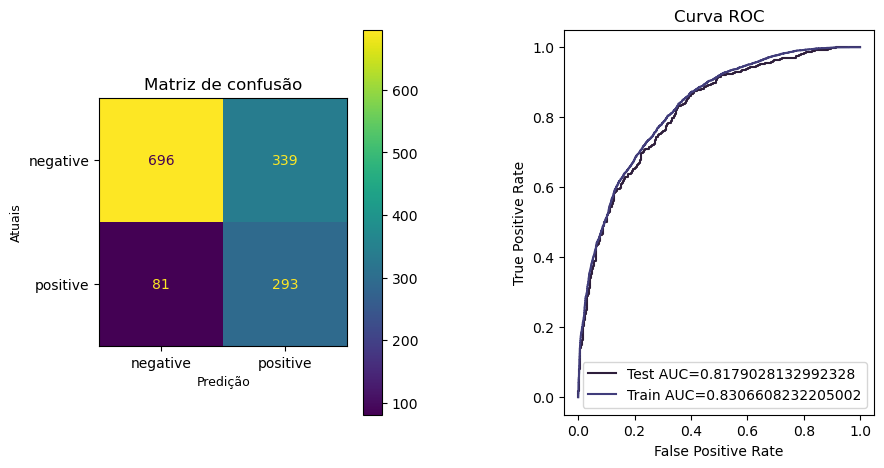

In [46]:
#Model Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, f1_score


model = GaussianNB()
param = { 'var_smoothing': [0.001,0.005, 0.01, 0.03, 0.05]}

model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_model(X_train, y_train, X_test, y_test, model, param)

fpr, tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_pred_proba[:,1])

auc = roc_auc_score(y_test, y_test_pred_proba[:,1])
auc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])

f1_score_train[model] = f1_score(y_train, y_train_pred, average='weighted')
print('F1 score of model{} on traing data is {}'.format(model, f1_score_train[model]))

f1_score_test[model] = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score of model{} on test data is {}'.format(model, f1_score_test[model]))

tpr_test[model] = tpr
fpr_test[model] = fpr
auc_test[model] = auc
auc_training[model] = auc_train

model_per_plot(y_test, y_test_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train)

    

F1 score of modelDecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_leaf=10,
                       min_samples_split=10) on traing data is 0.8333753507533024
F1 score of modelDecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       max_features='log2', min_samples_leaf=10,
                       min_samples_split=10) on test data is 0.8139040958275333


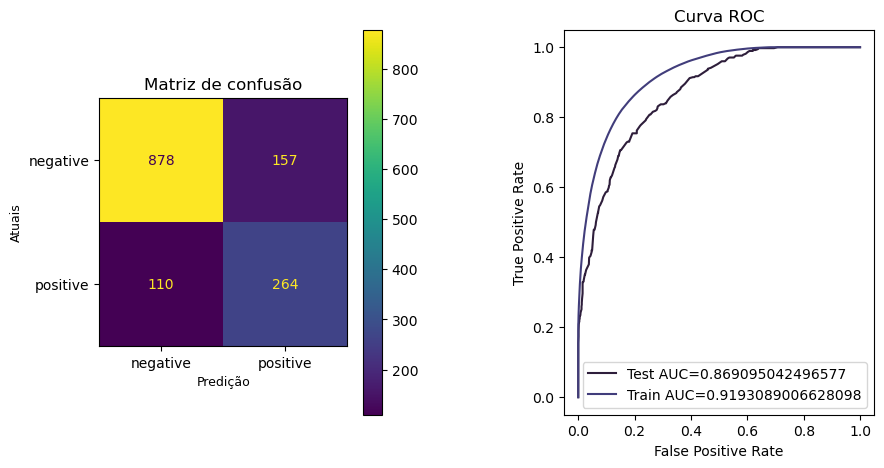

In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(class_weight= 'balanced', max_features='log2')

param = {'max_depth': [10,15,20,25],
         'min_samples_leaf': [3,5,10,15,20],
         'min_samples_split': [5,8,10,15,20],
         'max_features': ['sqrt', 'log2']}


model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_model(X_train, y_train, X_test, y_test, model, param)

fpr, tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_pred_proba[:,1])

auc = roc_auc_score(y_test, y_test_pred_proba[:,1])
auc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])

f1_score_train[model] = f1_score(y_train, y_train_pred, average='weighted')
print('F1 score of model{} on traing data is {}'.format(model, f1_score_train[model]))

f1_score_test[model] = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score of model{} on test data is {}'.format(model, f1_score_test[model]))

tpr_test[model] = tpr
fpr_test[model] = fpr
auc_test[model] = auc
auc_training[model] = auc_train

model_per_plot(y_test, y_test_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train)

F1 score of modelRandomForestClassifier(class_weight='balanced', max_features='log2',
                       max_samples=0.5, min_samples_split=5, n_estimators=120,
                       oob_score=True, random_state=30) on traing data is 0.9217215454864848
F1 score of modelRandomForestClassifier(class_weight='balanced', max_features='log2',
                       max_samples=0.5, min_samples_split=5, n_estimators=120,
                       oob_score=True, random_state=30) on test data is 0.8925045556812088


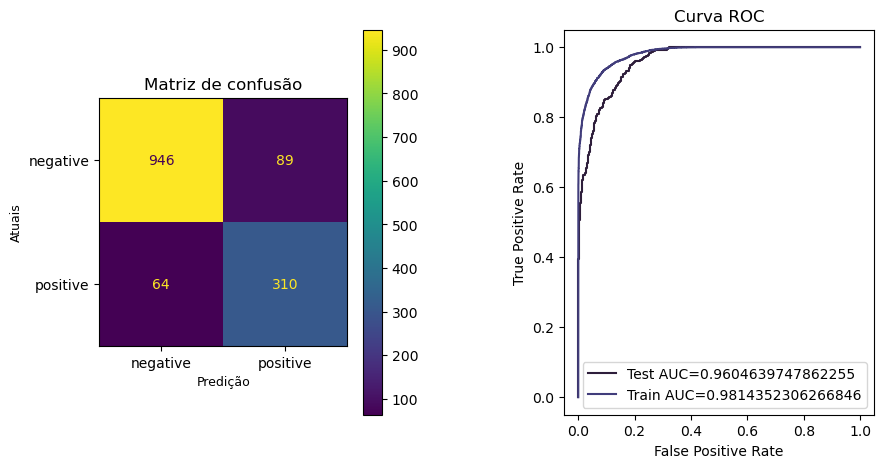

In [48]:
#Rando forest classifier

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state= 30, oob_score=True, max_features='log2')

param = {'n_estimators': [30, 50, 70, 100, 120], 'max_samples': [0.2, 0.3, 0.5], 'min_samples_split': [5, 8, 10, 15, 20]}


model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_model(X_train, y_train, X_test, y_test, model, param)

fpr, tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_pred_proba[:,1])

auc = roc_auc_score(y_test, y_test_pred_proba[:,1])
auc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])

f1_score_train[model] = f1_score(y_train, y_train_pred, average='weighted')
print('F1 score of model{} on traing data is {}'.format(model, f1_score_train[model]))

f1_score_test[model] = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score of model{} on test data is {}'.format(model, f1_score_test[model]))

tpr_test[model] = tpr
fpr_test[model] = fpr
auc_test[model] = auc
auc_training[model] = auc_train

model_per_plot(y_test, y_test_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train)

F1 score of modelKNeighborsClassifier(n_neighbors=15, p=1) on traing data is 0.8208412670169698
F1 score of modelKNeighborsClassifier(n_neighbors=15, p=1) on test data is 0.7857971682955098


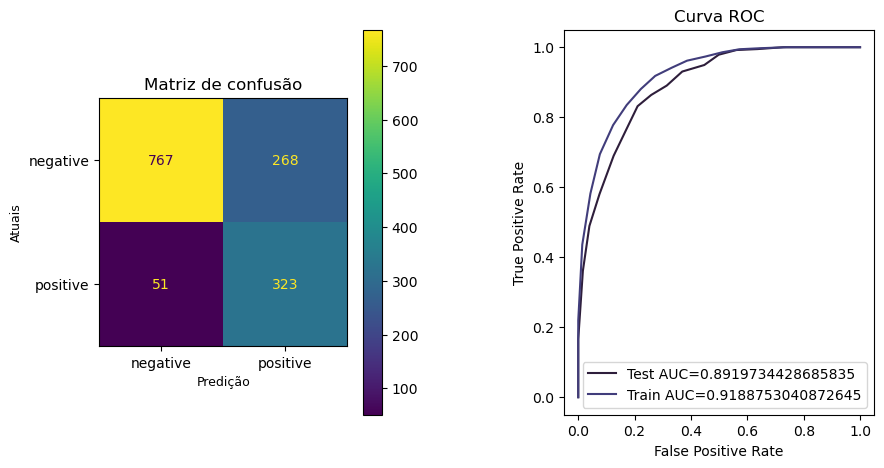

In [49]:
#K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(weights='uniform', algorithm='auto')

param = {'n_neighbors': [15, 20, 30, 45], 'p': [1, 2]}

model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_model(X_train, y_train, X_test, y_test, model, param)

fpr, tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_pred_proba[:,1])

auc = roc_auc_score(y_test, y_test_pred_proba[:,1])
auc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])

f1_score_train[model] = f1_score(y_train, y_train_pred, average='weighted')
print('F1 score of model{} on traing data is {}'.format(model, f1_score_train[model]))

f1_score_test[model] = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score of model{} on test data is {}'.format(model, f1_score_test[model]))

tpr_test[model] = tpr
fpr_test[model] = fpr
auc_test[model] = auc
auc_training[model] = auc_train

model_per_plot(y_test, y_test_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train)

F1 score of modelXGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) on traing data is 0.8666023080327379
F1 score of modelXGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_round

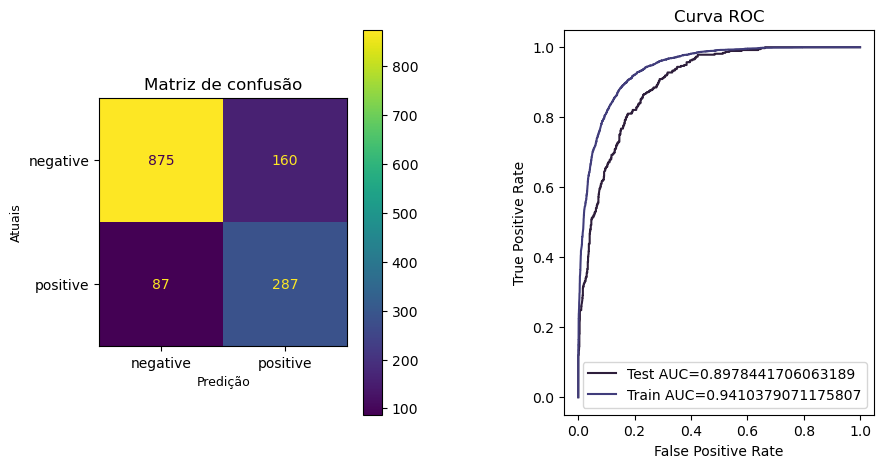

In [50]:
import xgboost as xgb

model = xgb.XGBClassifier()
param = {'n_estimators': [15], 'learning_rate': [0.5]}

model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_model(X_train, y_train, X_test, y_test, model, param)

fpr, tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_pred_proba[:,1])

auc = roc_auc_score(y_test, y_test_pred_proba[:,1])
auc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])

f1_score_train[model] = f1_score(y_train, y_train_pred, average='weighted')
print('F1 score of model{} on traing data is {}'.format(model, f1_score_train[model]))

f1_score_test[model] = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score of model{} on test data is {}'.format(model, f1_score_test[model]))

tpr_test[model] = tpr
fpr_test[model] = fpr
auc_test[model] = auc
auc_training[model] = auc_train

model_per_plot(y_test, y_test_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 score of modelLogisticRegression(C=0.5, max_iter=200) on traing data is 0.7988827846632941
F1 score of modelLogisticRegression(C=0.5, max_iter=200) on test data is 0.7636737566856859


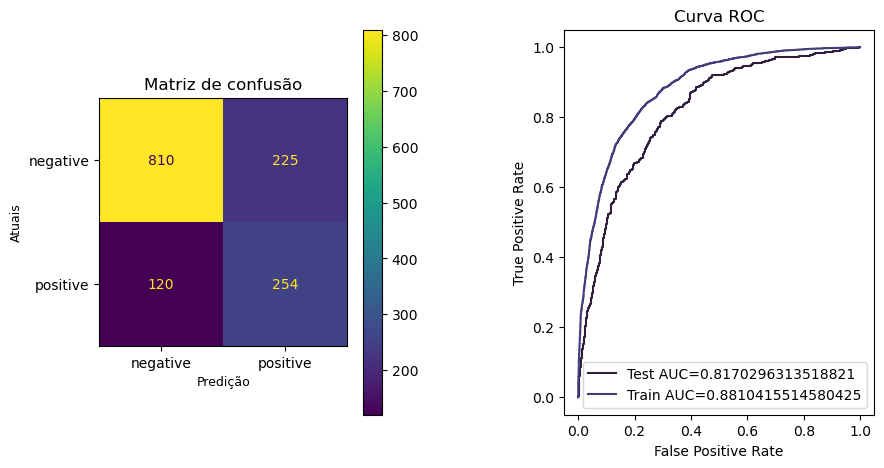

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
param= {'C': [0.5, 1, 2]}

model, y_train_pred, y_train_pred_proba, y_test_pred, y_test_pred_proba = evaluate_model(X_train, y_train, X_test, y_test, model, param)

fpr, tpr,_ = roc_curve(y_test, y_test_pred_proba[:,1])
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_pred_proba[:,1])

auc = roc_auc_score(y_test, y_test_pred_proba[:,1])
auc_train = roc_auc_score(y_train, y_train_pred_proba[:,1])

f1_score_train[model] = f1_score(y_train, y_train_pred, average='weighted')
print('F1 score of model{} on traing data is {}'.format(model, f1_score_train[model]))

f1_score_test[model] = f1_score(y_test, y_test_pred, average='weighted')
print('F1 score of model{} on test data is {}'.format(model, f1_score_test[model]))

tpr_test[model] = tpr
fpr_test[model] = fpr
auc_test[model] = auc
auc_training[model] = auc_train

model_per_plot(y_test, y_test_pred, fpr, tpr, fpr_train, tpr_train, auc, auc_train)

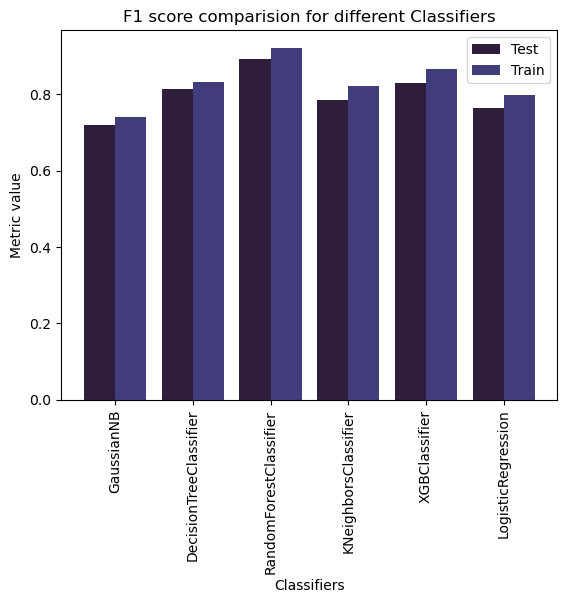

In [57]:
import matplotlib.pyplot as plt

classf = ['GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'XGBClassifier', 'LogisticRegression']

test_f1_score = list(f1_score_test.values())
train_f1_score = list(f1_score_train.values())

x_axis = np.arange(len(classf))

plt.bar(x_axis - 0.2, test_f1_score, 0.4, label= 'Test')
plt.bar(x_axis + 0.2, train_f1_score, 0.4, label= 'Train')

plt.xticks(x_axis, classf, rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Metric value')
plt.title('F1 score comparision for different Classifiers')
plt.legend()
plt.show()
